<a href="https://colab.research.google.com/github/SherZhou/HW_2/blob/main/bh_mass_bayesian_analysis_0412.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pymc as pm
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import arviz as az

In [ ]:
drive.mount('/content/drive')
print(f"Running on PyMC v{pm.__version__}")

Mounted at /content/drive
Running on PyMC v5.1.2


In [ ]:
gwtc = pd.read_csv('/content/drive/MyDrive/notebook/capstone/data/GWTC3_confident.csv')
bcat = pd.read_excel('/content/drive/MyDrive/notebook/capstone/data/blackcat_revised.xlsx')

In [ ]:
bcat

,NAME,Spectral,「orb,K2,f (M1),M1,q,i,Vrot sin i,Ref.
0,Swift J1357.2-0933y,M2-4V,2.8 土 0.3,967 士 49,11 士 2,8.30,〜0.04,〜90,NaN,"Corral-Santana et al. (2013), Mata Sanchez et ..."
1,XTEJ1650-500,〜K4V,7.69 士 0.02,435 士 30,2.7 土 0.6,7.30,NaN,>47,NaN,Orosz et al. (2004)
2,XTEJ1118+480,K7-M1V,4.078414 土 0.000005,709 士 1,6.27 土 0.04,7.55,0:024 土 0:009,68-79,96+3 96-11,"Khargharia et al. (2013), Torres et al. (2004)..."
3,XTEJ1859+226 (V406Vul),〜K5V,6.58 土 0.05,541 士 70,4.5 土 0.6,5.42,NaN,<70,NaN,Corral-Santana et al. (2011)
4,SAXJ1819.3-2525 (V4641 Sgr),B9III,67.6152 土 0.0002,211 士 3,2.7 土 0.1,6.40,0.63-0.70,72 士 4,100 9土0 8,"Orosz et al. (2001), MacDonald et al. (2014)"
5,XTEJ1550-564,K2-4IV,37.0088 土 0.0001,363 士 6,7.7 土 0.4,11.70,乂 0.03,75 士 4,55 士 5,"Orosz et al. (2002,2011b)"
6,GROJ1655-40 (N. Sco 94),F6IV,62.920 土 0.003,226.1 土 0.8,2.73 土 0.09,6.00,0:42 土 0:03,69 士 2,8614,"Orosz & Bailyn (1997), van der Hooft et al. (1..."
7,GRS 1009-45 (N. Vel 93),K7-M0V,6.8449 土 0.0003,475 士 6,3.2 土 0.1,4.40,0:055 土 0:010,37-80,87 士 5,"Filippenko et al. (1999), Shahbaz et al. (1996..."
8,GRS1915+105 (V406 Vul),K1-5III,812 士 4,126 士 1,7.0 土 0.2,12.00,0:042 土 0:024,60 士 5,21 士 4,"Harlaftis & Greiner (2004), Steeghs et al. (20..."
9,GROJ0422+32,M4-5V,5.09185 土 0.000005,378 士 16,1.19 土 0.02,8.50,0 11+0.05 011-0.02,10-50,90+22 90-27,"Webb et al. (2000), Casares et al. (1995b), Ge..."


In [ ]:
gwtc

,id,commonName,version,catalog.shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW191103_012549-v1,GW191103_012549,1,GWTC-3-confident,1.256780e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,11.8,-2.2,6.2,...,0.09,0.460000,NaN,NaN,0.94318,NaN,NaN,19.00,-1.70,3.80
1,GW191105_143521-v1,GW191105_143521,1,GWTC-3-confident,1.257000e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,10.7,-1.6,3.7,...,0.07,0.012000,NaN,NaN,0.99000,NaN,NaN,17.60,-1.20,2.10
2,GW191109_010717-v1,GW191109_010717,1,GWTC-3-confident,1.257297e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,65.0,-11.0,11.0,...,0.18,0.000180,NaN,NaN,0.99000,NaN,NaN,107.00,-15.00,18.00
3,GW191113_071753-v1,GW191113_071753,1,GWTC-3-confident,1.257665e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,29.0,-14.0,12.0,...,0.18,26.000000,NaN,NaN,0.68339,NaN,NaN,34.00,-10.00,11.00
4,GW191126_115259-v1,GW191126_115259,1,GWTC-3-confident,1.258804e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,12.1,-2.2,5.5,...,0.12,3.200000,NaN,NaN,0.70041,NaN,NaN,19.60,-2.00,3.50
5,GW191127_050227-v1,GW191127_050227,1,GWTC-3-confident,1.258866e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,53.0,-20.0,47.0,...,0.40,0.250000,NaN,NaN,0.73996,NaN,NaN,76.00,-21.00,39.00
6,GW191129_134029-v1,GW191129_134029,1,GWTC-3-confident,1.259070e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,10.7,-2.1,4.1,...,0.05,0.000010,NaN,NaN,0.99000,NaN,NaN,16.80,-1.20,2.50
7,GW191204_110529-v1,GW191204_110529,1,GWTC-3-confident,1.259493e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,27.3,-6.0,11.0,...,0.25,3.300000,NaN,NaN,0.74239,NaN,NaN,45.00,-7.60,8.60
8,GW191204_171526-v1,GW191204_171526,1,GWTC-3-confident,1.259515e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,11.9,-1.8,3.3,...,0.04,0.000010,NaN,NaN,0.99000,NaN,NaN,19.21,-0.95,1.79
9,GW191215_223052-v1,GW191215_223052,1,GWTC-3-confident,1.260484e+09,/GWTC-3/,https://www.gw-openscience.org/eventapi/json/G...,24.9,-4.1,7.1,...,0.13,0.000010,NaN,NaN,0.99000,NaN,NaN,41.40,-4.10,5.10


<ipython-input-6-07ed25821f82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p0=sns.distplot(gwtc['final_mass_source'],


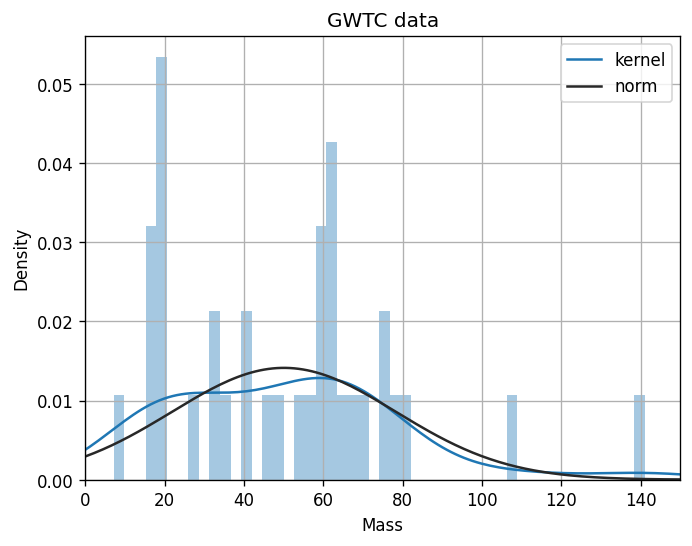

In [ ]:
plt.figure(dpi=120)
p0=sns.distplot(gwtc['final_mass_source'],
               hist=True,
               bins=50,
               kde=True,
              fit=norm,)
plt.xlim(0, 150)
plt.xlabel("Mass")
plt.ylabel("Density")
plt.title("GWTC data")
plt.legend(['kernel', 'norm'])
plt.grid()
plt.show()

<ipython-input-7-c0ac9277782f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p0=sns.distplot(np.log10(gwtc['final_mass_source']),


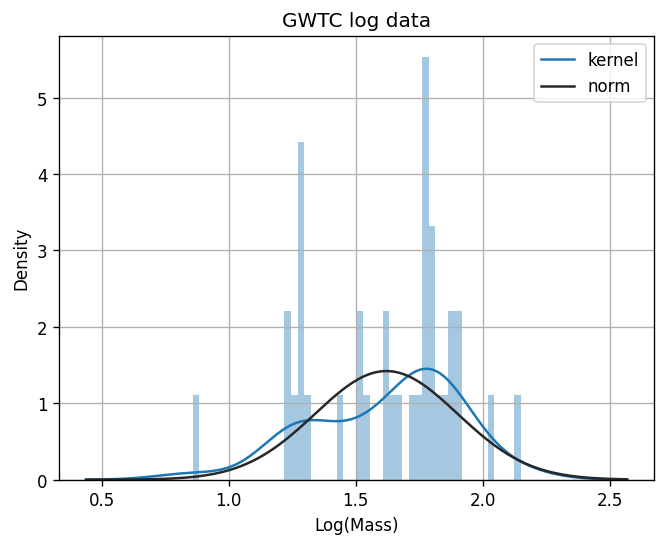

In [ ]:
plt.figure(dpi=120)
p0=sns.distplot(np.log10(gwtc['final_mass_source']),
               hist=True,
               bins=50,
               kde=True,
              fit=norm,)
# plt.xlim(0, 150)
plt.xlabel("Log(Mass)")
plt.ylabel("Density")
plt.title("GWTC log data")
plt.legend(['kernel', 'norm'])
plt.grid()
plt.show()

<ipython-input-8-5f7773f4bc93>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p0=sns.distplot(bcat['M1'],


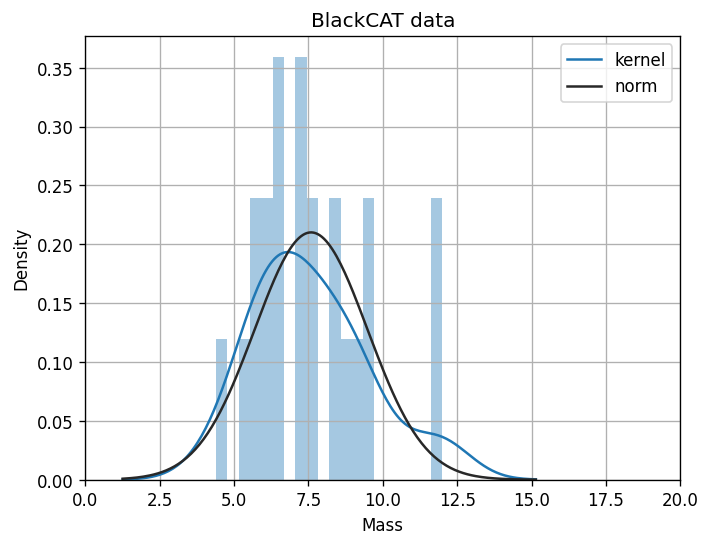

In [ ]:
plt.figure(dpi=120)
p0=sns.distplot(bcat['M1'],
               hist=True,
               bins=20,
               kde=True,
              fit=norm)
              #  color="#098154")
plt.xlim(0, 20)
plt.xlabel("Mass")
plt.ylabel("Density")
plt.title("BlackCAT data")
plt.legend(['kernel', 'norm'])
plt.grid()
plt.show()

<ipython-input-9-b16fe8a7d206>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p0=sns.distplot(np.log10(bcat['M1']),


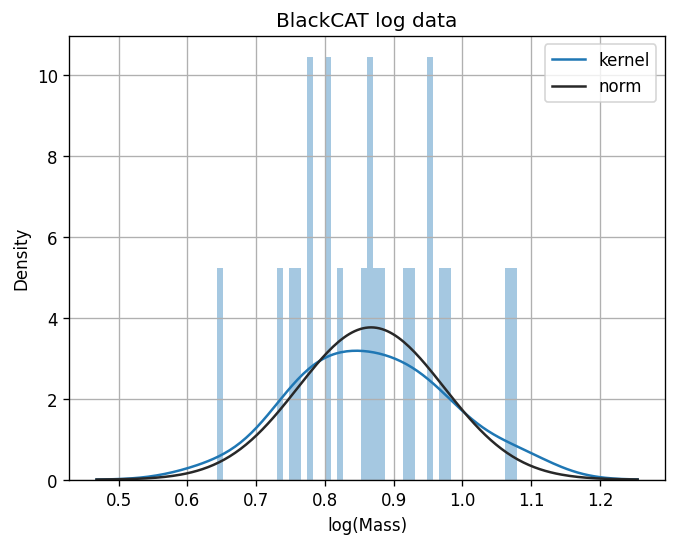

In [ ]:
plt.figure(dpi=120)
p0=sns.distplot(np.log10(bcat['M1']),
               hist=True,
               bins=50,
               kde=True,
              fit=norm,)
# plt.xlim(0, 150)
plt.xlabel("log(Mass)")
plt.ylabel("Density")
plt.title("BlackCAT log data")
plt.legend(['kernel', 'norm'])
plt.grid()
plt.show()

In [ ]:
# bayesian model
mu_m = np.log10(gwtc['final_mass_source']).mean()
mu_s = np.log10(gwtc['final_mass_source']).std()
mu_m2 = bcat['M1'].mean()
mu_s2 = bcat['M1'].std()



sigma_low = gwtc['final_mass_source'].std() *0.1
sigma_high = gwtc['final_mass_source'].std() * 10
sigma_low2 = bcat['M1'].std() *0.1
sigma_high2 = bcat['M1'].std() * 10

with pm.Model() as model_log:
    gwtc_mean = pm.Normal('gwtc_mean', mu_m, mu_s)
    bcat_mean = pm.Normal('bcat_mean', mu_m2, mu_s2)
    
    gwtc_std = pm.Uniform('gwtc_std', lower=sigma_low, upper=sigma_high)
    bcat_std = pm.Uniform('bcat_std', lower=sigma_low2, upper=sigma_high2)
    #Degrees of freedom
    nu = pm.Exponential('nu_minus_one', 1/29) + 1
    
    gwtc_lambda = gwtc_std**-2
    bcat_lambda = bcat_std**-2
   
    gwtc_group_log = pm.StudentT('gwtc_group_log', nu=nu, mu=gwtc_mean, lam=gwtc_std, observed=np.log10(gwtc['final_mass_source']))
    bcat_group_log = pm.StudentT('bcat_group_log', nu=nu, mu=bcat_mean, lam=bcat_std, observed=np.log10(bcat['M1']))

    
    diff_of_means = pm.Deterministic('difference of means', gwtc_mean - bcat_mean)
    diff_of_stds = pm.Deterministic('difference of stds', gwtc_std - bcat_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((gwtc_std**2 + bcat_std**2) / 2))
    # trace = pm.sample()

In [ ]:
#db_log_XEdot = pm.backends.text.load('trace_log_XEdot', model=model_log_XEdot)
with model_log:
    db_log = pm.backends.NDArray('trace_log')
    trace_log = pm.sample(25000, tune=2000, trace=db_log)

In [ ]:
trace_log

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

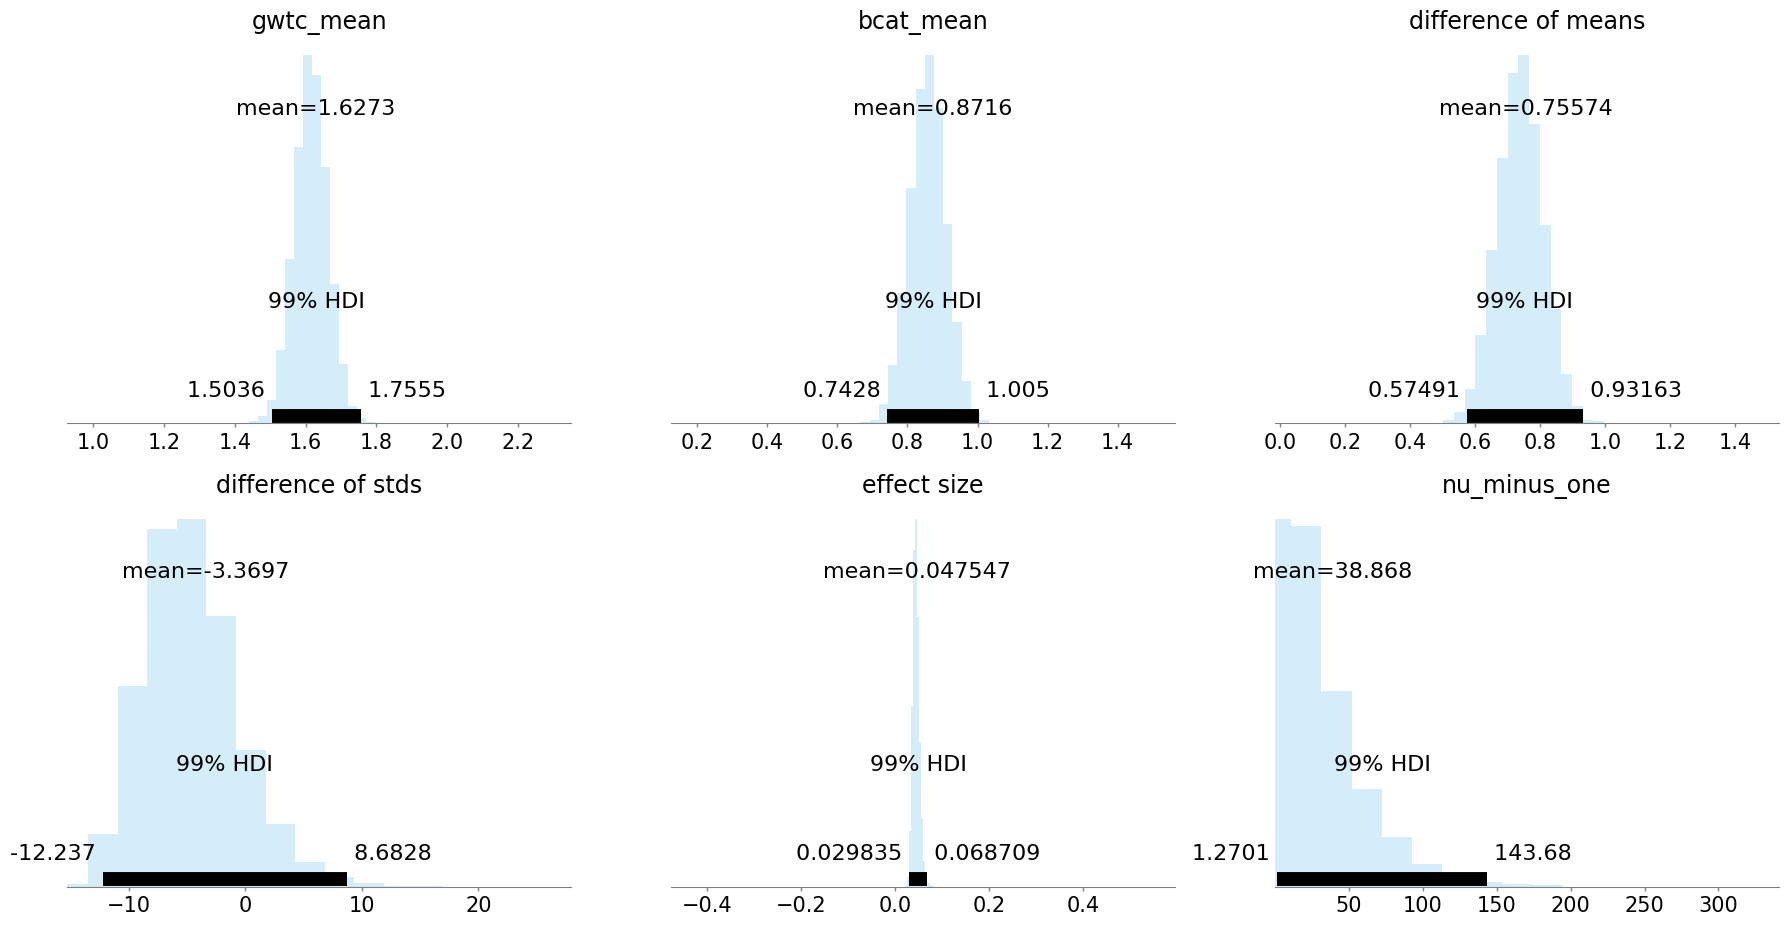

In [ ]:
#Highest Density Interval
#HPD -- HPD interval is the shortest interval among all of the Bayesian Credible Intervals. 
fig = pm.plot_posterior(trace_log, var_names=['gwtc_mean','bcat_mean','difference of means','difference of stds','effect size','nu_minus_one'], 
               hdi_prob=0.99,linewidth=5, textsize=15,round_to=5, color='#87ceeb',kind='hist')

array([[<Axes: title={'center': 'gwtc_mean'}>,
        <Axes: title={'center': 'gwtc_mean'}>],
       [<Axes: title={'center': 'bcat_mean'}>,
        <Axes: title={'center': 'bcat_mean'}>],
       [<Axes: title={'center': 'gwtc_std'}>,
        <Axes: title={'center': 'gwtc_std'}>],
       [<Axes: title={'center': 'bcat_std'}>,
        <Axes: title={'center': 'bcat_std'}>],
       [<Axes: title={'center': 'nu_minus_one'}>,
        <Axes: title={'center': 'nu_minus_one'}>],
       [<Axes: title={'center': 'difference of means'}>,
        <Axes: title={'center': 'difference of means'}>],
       [<Axes: title={'center': 'difference of stds'}>,
        <Axes: title={'center': 'difference of stds'}>],
       [<Axes: title={'center': 'effect size'}>,
        <Axes: title={'center': 'effect size'}>]], dtype=object)

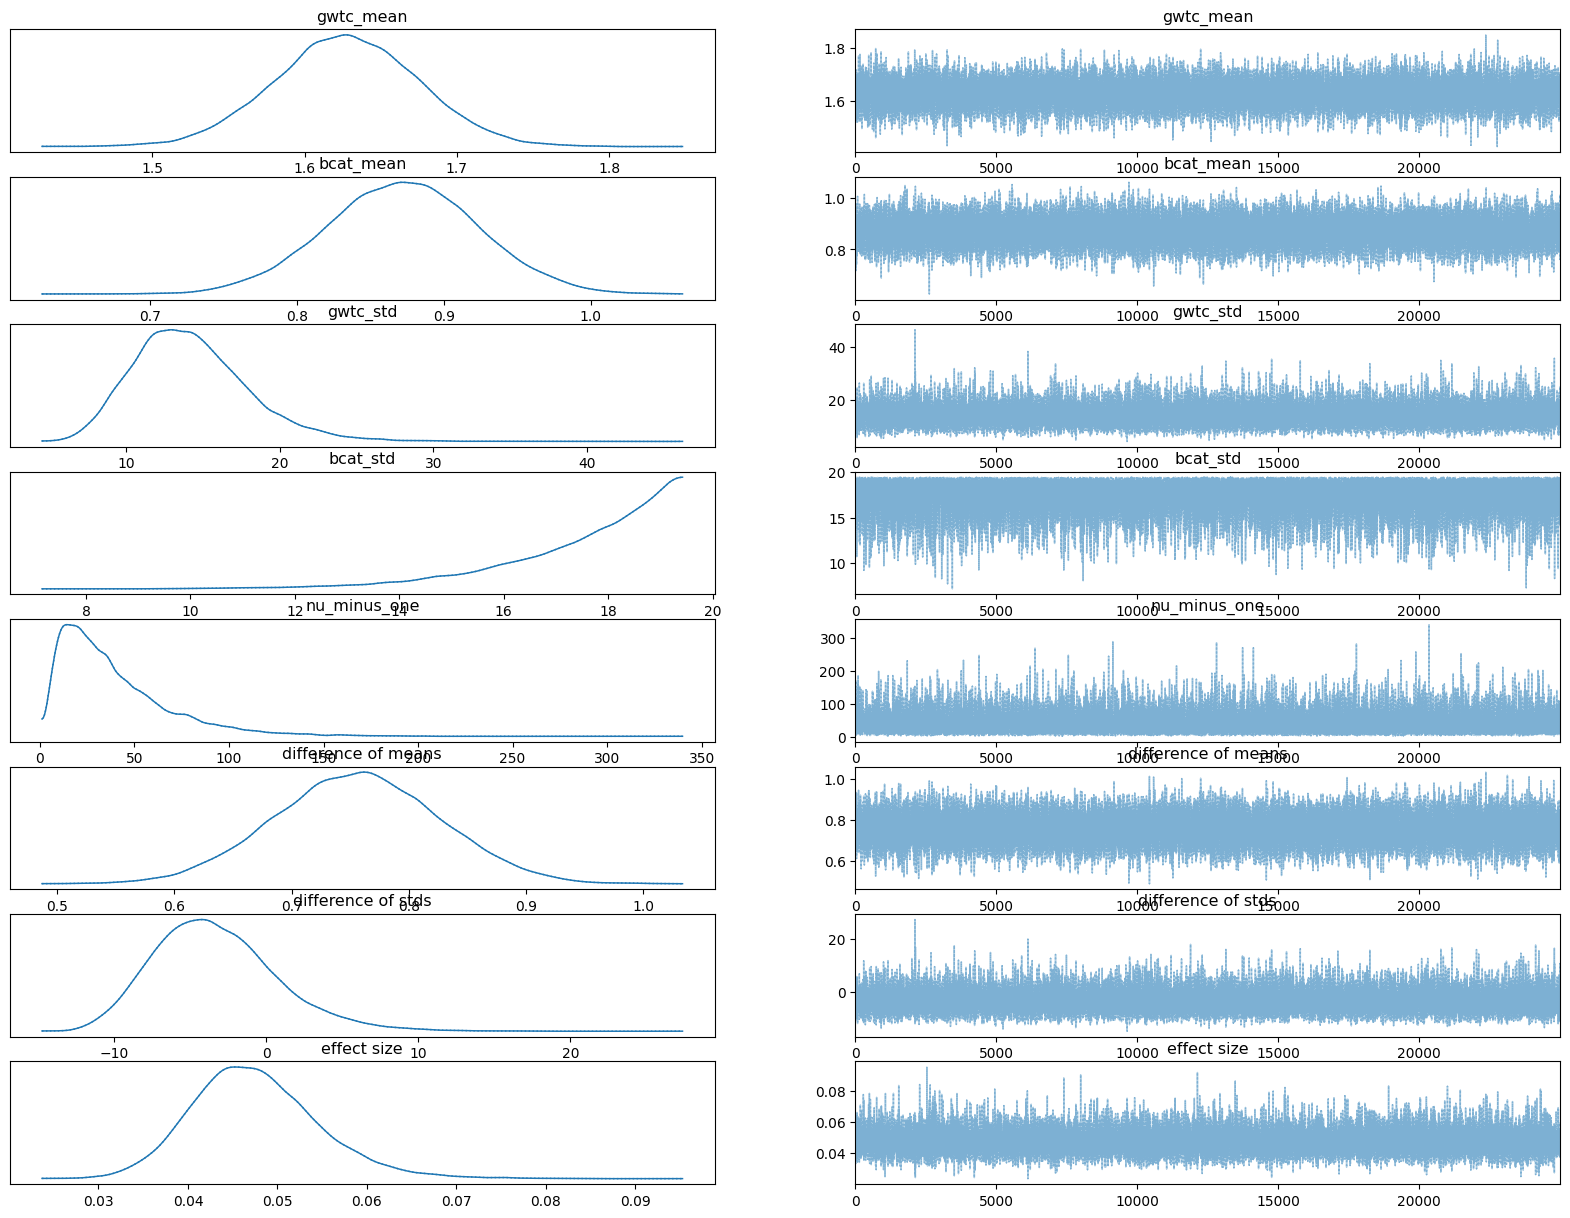

In [ ]:
#采样分析图
pm.plot_trace(trace_log,figsize=(20, 15))

In [ ]:
#ppc check
ppc=pm.sample_posterior_predictive(trace_log,model=model_log,var_names=['gwtc_group_log','bcat_group_log'],)

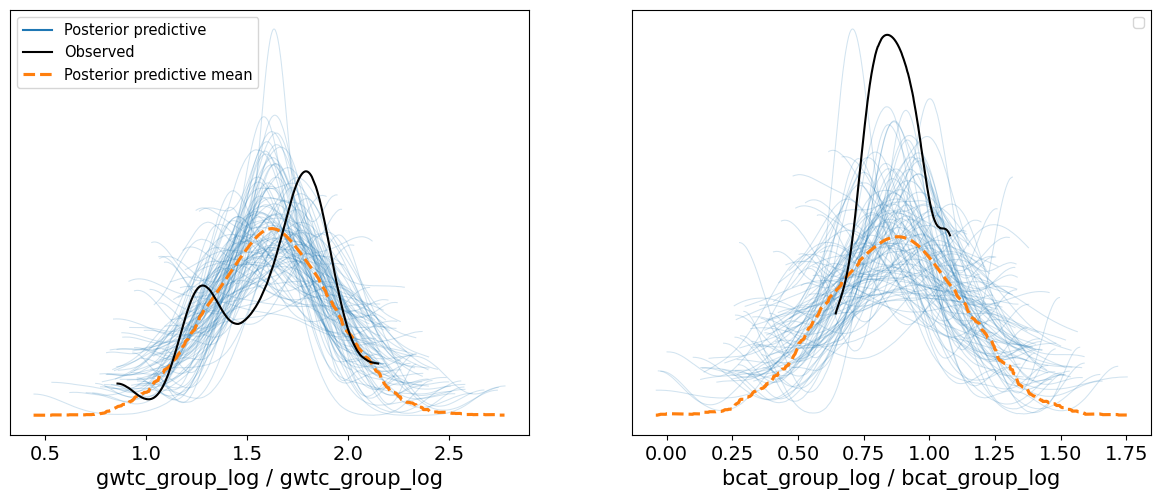

In [ ]:
az.plot_ppc(ppc, num_pp_samples=100);

In [ ]:
#Guassian mixture

# 构建模型
with pm.Model() as model_GMM:
    # 定义两个高斯分布，每个分布有自己的均值和标准差
    mean1 = pm.Normal('mean1', 1.25, 10)
    sd1 = pm.HalfNormal('sd1', 10)
    mean2 = pm.Normal('mean2', 1.9, 10)
    sd2 = pm.HalfNormal('sd2', 10)

    # 定义两个高斯分布的权重
    w = pm.Dirichlet('weights', a=np.array([1, 1]))

    # 定义混合高斯分布
    mix = pm.Mixture('mix', w=w, comp_dists=[
        pm.Normal.dist(mu=mean1, sigma=sd1),
        pm.Normal.dist(mu=mean2, sigma=sd2)
    ], observed=np.log10(gwtc['final_mass_source']))

# 采样参数
with model_GMM:
    db_GMM = pm.backends.NDArray('trace')
    trace_GMM = pm.sample(2000,tune=2000, trace=db_GMM)
# with model_X:
#     db_X = pm.backends.NDArray('trace_X')
#     trace_X = pm.sample(25000, tune=2000, trace=db_X)



In [ ]:
trace_GMM

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
trace_GMM.posterior.weights[1][:]

<xarray.DataArray 'weights' (draw: 2000, weights_dim_0: 2)>
array([[0.9192788 , 0.0807212 ],
       [0.9192788 , 0.0807212 ],
       [0.9192788 , 0.0807212 ],
       ...,
       [0.93759415, 0.06240585],
       [0.9280435 , 0.0719565 ],
       [0.97543849, 0.02456151]])
Coordinates:
    chain          int64 1
  * draw           (draw) int64 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
  * weights_dim_0  (weights_dim_0) int64 0 1

In [ ]:
trace_GMM.posterior.weights[1]

<xarray.DataArray 'weights' (draw: 2000, weights_dim_0: 2)>
array([[0.9192788 , 0.0807212 ],
       [0.9192788 , 0.0807212 ],
       [0.9192788 , 0.0807212 ],
       ...,
       [0.93759415, 0.06240585],
       [0.9280435 , 0.0719565 ],
       [0.97543849, 0.02456151]])
Coordinates:
    chain          int64 1
  * draw           (draw) int64 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
  * weights_dim_0  (weights_dim_0) int64 0 1

In [ ]:
df = pd.DataFrame(trace_GMM.posterior.weights[1])

In [ ]:
print("Normal distribution1 weight:",df[0].mean(),"\nNormal distribution2 weight:",df[1].mean())

Normal distribution1 weight: 0.9699553368639975 
Normal distribution2 weight: 0.030044663136002653


<ipython-input-88-ec9bf5107349>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p0=sns.distplot(df[0],
<ipython-input-88-ec9bf5107349>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p0=sns.distplot(df[1],


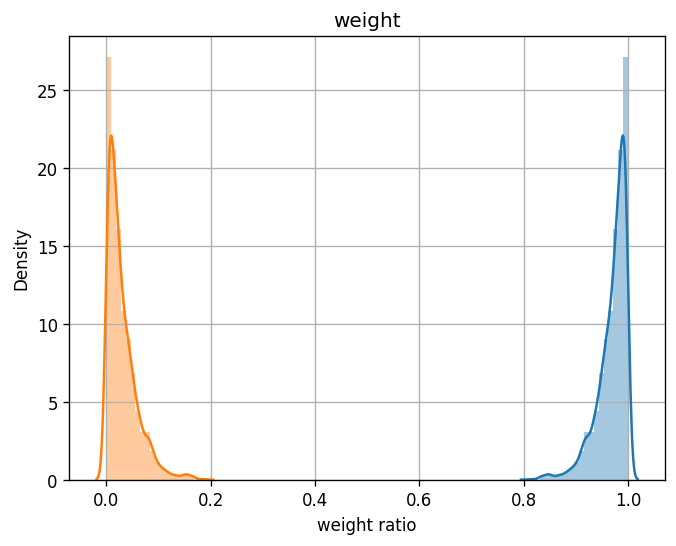

In [ ]:
plt.figure(dpi=120)
p0=sns.distplot(df[0],
               hist=True,
               bins=20,
               kde=True,)
              #  color="#098154")
# plt.xlim(0, 20)
p0=sns.distplot(df[1],
               hist=True,
               bins=20,
               kde=True,)
plt.title("weight")
plt.xlabel("weight ratio")
plt.ylabel("Density")
plt.grid()
plt.show()